## Learning Objectives
The goal of this notebook is for describing data and to see and practice:
- Load raw data
- View the loaded data
- Formulate an explorative data description question
 - Describe the raw data tables
- See and practice data science research tools and practices

### 1 Practical Data Science Research
Can we find good online learning strategies?

We need to define:
- "good", what is good in context of learning?
- "learning", what is learning, and how do you measure it?
- "strategy", what is a strategy for learning and how would you observe it?

Then we need to ask:
- Is it possible to observe any learning in the data?
- Are there any observable strategies?

**Note:** Without a clear goal you can get lost in the data, however there is also a need to explore.
So how do you balance broad exploration for knowledge and in-depth exploitation knowledge.

#### Data used
```
Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).
```
See [https://analyse.kmi.open.ac.uk/open_dataset#about](https://analyse.kmi.open.ac.uk/open_dataset#about)


#### What do the tables in the data look like?
**Note:** If you are getting ahead explore the other tables as well


### 2 Import software libraries
There are data science libraries in `Python` for data structures, analysis and plotting

**Note:**
- Using the correct path to the library is important. 
 - Do not ask me how many times I have had import errors. I usually have a "standard" 
layout for projects to avoid spending too  much time on configuration of software.
- Using an appropriate data structure is important for usability and computational performance


In [1]:
# Import python standard library for operating system functionality. 
# This improves portability 
import os
# Library for random numbers
import random

# Blank line convention to separate the standard libraries and the other libraries.
# Data structure and analysis library
import pandas as pd
# Data visualization based on `matplotlib`
import seaborn as sns
# Plotting library
import matplotlib.pyplot as plt


### 3 Notebook variables and settings

By declaring variables with at the top means that they are in
scope for the entire `Jupyter` notebook

**Note:**
- The scope of the variables in a `Jupyter` notebook can be confusing if your programing experience is in a different
environment.
 - A code structure can reduce confusion and reproducability
- Sensible variable names provides better readability
 - Editors with auto-complete maintains typing efficiency


In [2]:
# Where am I
print(os.getcwd())
# Declare constants
DATA_FOLDER = '../data'
# Set visualization styles with a predefined `seaborn` style
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


/Users/erikhemberg/Documents/MIT_PostDoc/data_science_workshop/CoLAB-Workshop-2019/src


### 4 Load raw data
We want to work with data in the `DATA_FOLDER`
- What is the size of the data you want to work with?
- Can it fit in memory on the the hardware you are using?
 - **Note:** Too large data can reduce the performance.
- Is all the data needed at this point?

**Note:** When writing output, remember to be consistent, that makes searching outupt, e.g. files or content.

In [3]:
print('File name: File size')
# List files in the `DATA_FOLDER`
files = os.listdir(DATA_FOLDER)
# Iterate over each file in the folder
for file_name in files:
    # Get the file stats
    file_stat = os.stat(os.path.join(DATA_FOLDER, file_name))
    # Convert the file size in bytes to MB
    size_MB = file_stat.st_size / 1024**2 
    # Print the file name and size
    print('{}: {:.3f} MB'.format(file_name, size_MB))
    

File name: File size
studentAssessment.csv: 5.427 MB
studentInfo.csv: 3.301 MB
studentVle.csv: 432.812 MB
vle_data.zip: 44.585 MB
README.md: 0.000 MB
courses.csv: 0.001 MB
vle.csv: 0.248 MB
studentRegistration.csv: 1.059 MB
assessments.csv: 0.008 MB


What is in the data that can help answer the research question?
- Break down the exploration into small steps, sub questions. 
- `cources.csv` seems promising and not too large. 

Initial sub question is
- How many courses are there in the data set?


In [4]:
# Load "raw" data regarding courses. 

# Loading data in a separate cell can avoid computationally expensive file IO.
# Declare the path to the data file with course info
courses_path = os.path.join(DATA_FOLDER, 'courses.csv')
# Use `pandas` `read_csv` to read the CSV data file in as a `pandas` `DataFrame`
courses = pd.read_csv(courses_path)


When can we work with a subset of the the data and why would we?
- Early in development to speed up parts not dependent
 on all data by both reducing computational time and analysis.
 
**Note:** avoid drawing too strong conclusions on data subsets.


In [5]:
# Define functions in separate cells for code separation and structure.
def count_lines(file_path):
    """
    Count total number of lines in a file. 
    
    Not optimized for speed. See e.g. https://stackoverflow.com/questions/845058/how-to-get-line-count-cheaply-in-python
    :param file_path: Path to file
    :type file_path: str
    :return: Total number of lines in the file
    :rtype int:
    """
    with open(file_path, 'r') as file_descriptor:
        _n_lines = 0
        for _ in file_descriptor:
            _n_lines += 1
            
    return _n_lines


Get a data sample from the `courses.csv` data


In [6]:
# Ratio of lines to sample
RATIO_OF_SAMPLES_FROM_DATA_FILE = 0.2
# Get number of lines in the file
n_lines = count_lines(courses_path)
# Get number of lines to sample. Cast it to an integer 
n_samples_course = int(n_lines * RATIO_OF_SAMPLES_FROM_DATA_FILE)
# `pandas` `read_csv` API specifies number of lines(rows) to skip
n_lines_to_skip = n_lines - n_samples_course
# Uniformly randomly sample which lines to skip. They need to be ordered
skip_lines = sorted(random.sample(range(1, n_lines), n_lines_to_skip))
# Read file the sampled lines of the file
sample_courses = pd.read_csv(courses_path, skiprows=skip_lines)
# Print sampled data. Note the difference in size with the complete data frame 
print("Rows and columns in the data sample: {}".format(sample_courses.shape))
# Assert that the sample has fewer (or equal) lines than the original
# `assert` is a very convenient keyword to check TODO elaborate
assert n_lines >= sample_courses.shape[0]

Rows and columns in the data sample: (3, 3)


What does the data look like

In [7]:
print("Information about the data frame")
print(courses.info())
print("First row in dataframe")
print(courses.head(1))
# What are the names of the columns
print("Columns: {}".format(courses.columns))


Information about the data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
None
First row in dataframe
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
Columns: Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')


In [8]:
# There are often prettier ways to display things.
import IPython.display as display
# Use the `IPython` display function
display.display(courses.head(1))


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268


### 5 Explore the data 

The data is now loaded. So we can see if we can answer some questions.
- How many unique modules (`code_module`) are there?
 - **Note:** It can be useful to formulate questions to guide the exploration to avoid getting lost.
- How many unique module presentations (`code_presentation`) are there? 

In [9]:
# Columns of interest
cols = ['code_module', 'code_presentation']
# Iterate over columns in the data frame
for col in cols:
    # Get unique column values
    unique_values = courses[col].unique()
    # Get number of unique values
    n_unique_values = len(unique_values)
    print('Categories for {}: {}; n categories: {}'.format(col, unique_values, n_unique_values))
    

Categories for code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']; n categories: 7
Categories for code_presentation: ['2013J' '2014J' '2013B' '2014B']; n categories: 4


What is the presentation length for each code_module?
- What could the difference depend on?


Text(0, 0.5, 'Module Presentation Length')

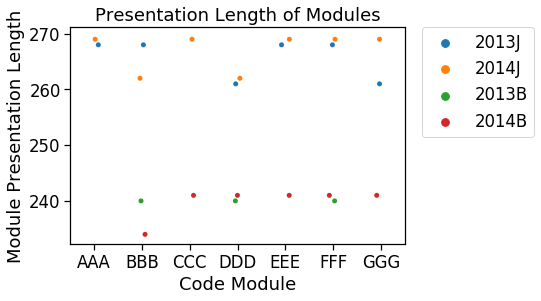

In [10]:
# Column name for x-axis values
xs = 'code_module'
# Column name for y-axis values
ys = 'module_presentation_length'
# Column name for the colors in the plot
group_name = 'code_presentation'

# Plot the data points
ax = sns.stripplot(x=xs, y=ys, hue=group_name, data=courses)
# Set the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# We call `matplotlib` instead of using the `seaborn` api
# Set plot title
ax.set_title('Presentation Length of Modules')
# Lazy programmer showoff. Create an anonymous function (lambda) that splits the function argument on `_` to a list and
# captalizes each element. Then the elements of the list are joined as a string separated by ` `
pretty_label = lambda x: ' '.join([_.capitalize() for _ in x.split('_')])
# Set x label
ax.set_xlabel(pretty_label(xs))
# Set y label
ax.set_ylabel(pretty_label(ys))


Tabular description of the groups based on descriptive statistics

In [11]:
# Get the groups
code_modules = courses.groupby(by=xs)
# Iterate over the groups
for name, group in code_modules:
    print('Descriptive stats for {} grouped by {}: {}'.format(ys, xs, name))
    print(group[ys].describe())
    

Descriptive stats for module_presentation_length grouped by code_module: AAA
count      2.000000
mean     268.500000
std        0.707107
min      268.000000
25%      268.250000
50%      268.500000
75%      268.750000
max      269.000000
Name: module_presentation_length, dtype: float64
Descriptive stats for module_presentation_length grouped by code_module: BBB
count      4.000000
mean     251.000000
std       16.532796
min      234.000000
25%      238.500000
50%      251.000000
75%      263.500000
max      268.000000
Name: module_presentation_length, dtype: float64
Descriptive stats for module_presentation_length grouped by code_module: CCC
count      2.00000
mean     255.00000
std       19.79899
min      241.00000
25%      248.00000
50%      255.00000
75%      262.00000
max      269.00000
Name: module_presentation_length, dtype: float64
Descriptive stats for module_presentation_length grouped by code_module: DDD
count      4.000000
mean     251.000000
std       12.138094
min      240.

#### What is the descriptive statistics and visualization of the other tables in the data?


### 6 Explore the concept of learning as measured by final grade
- What is the final grade?
 - In this data it is `final_result` in the `studentInfo` table

In [12]:
# Load data
student_info_path = os.path.join(DATA_FOLDER, 'studentInfo.csv')
student_info = pd.read_csv(student_info_path)
print(student_info.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


**Note:** With unfamiliar APIs and dynamically typed languages such as `python` it can be difficult to know which 
variable operations are syntactically correct.

Final result values (categories): ['Pass' 'Withdrawn' 'Fail' 'Distinction']
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64
<class 'pandas.core.series.Series'> Index(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype='object')


Text(0, 0.5, 'Ratio')

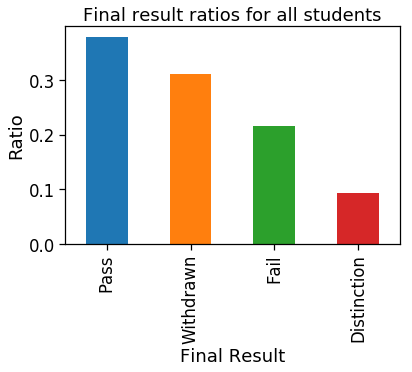

In [13]:
# Get final results column values

# Get the unique values
print('Final result values (categories): {}'.format(student_info['final_result'].unique()))
# Get the number of values for each category
final_results = student_info['final_result'].value_counts()
print(final_results.head())
# These values are now a `pandas.Series` indexed by the category
print(type(final_results), final_results.index)
# Normalize the value counts
final_results = final_results.div(final_results.sum(), axis=0)
# Plot the final results categories
ax = final_results.plot(kind='bar')
ax.set_title('Final result ratios for all students')
ax.set_xlabel('Final Result')
ax.set_ylabel('Ratio')


What is the completion rate?

In [14]:
# Sum the values for non-completion
# Find the rows that has Fail or Withdrawn and sum the values
def get_completion_rate(df):
    not_completed = df.loc[['Fail', 'Withdrawn']].sum()
    completed = 1.0 - not_completed
    print("Final result:")
    print("not completed: {:.3f}".format(not_completed))
    print("completed: {:.3f}".format(completed))

get_completion_rate(final_results)

Final result:
not completed: 0.528
completed: 0.472


What is the final grade for module `AAA`?
- Now we need to filter the data based on the module we are interested in

**Note:** The code seems repetitive

Pass           487
Withdrawn      126
Fail            91
Distinction     44
Name: final_result, dtype: int64


Text(0, 0.5, 'Ratio')

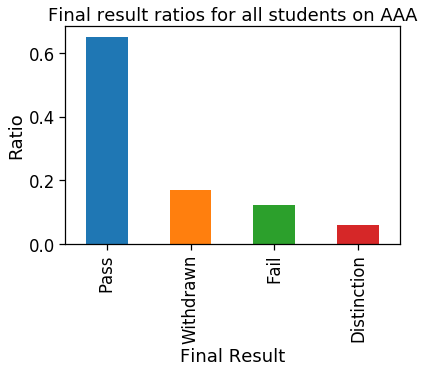

In [15]:
# Define code module
code_module = 'AAA'
# Get the number of values for each category for the code module
student_info_f = student_info.loc[student_info['code_module'] == code_module]
final_results_f = student_info_f['final_result'].value_counts()
print(final_results_f.head())
# Normalize the value counts
final_results_f = final_results_f.div(final_results_f.sum(), axis=0)
# Plot the final results categories
ax = final_results_f.plot(kind='bar')
ax.set_title('Final result ratios for all students on {}'.format(code_module))
ax.set_xlabel('Final Result')
ax.set_ylabel('Ratio')


What is the completion rate for `AAA`?

In [16]:
get_completion_rate(final_results_f)


Final result:
not completed: 0.290
completed: 0.710


#### What are the final results for each code_module?
